# Principal Component Analysis Example


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as io

In [4]:
## 1. Load Yale Image data set

In [5]:
image_paths = [os.path.join("yalefaces", file_name) for file_name in os.listdir("yalefaces")]
image_data = []

for image_path in image_paths:
    image = io.open(image_path)
    image = image.resize((50,50), io.ANTIALIAS)
    image_asvec = np.array(image).flatten()
    image_data.append(image_asvec)

faces = np.vstack(image_data)
faces.shape

(166, 2500)

In [6]:
## 2. Compute and plot the average face

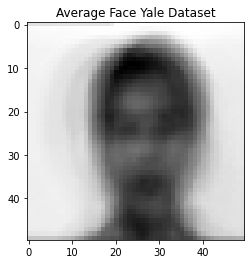

In [7]:
average_face = np.mean(faces, axis=0)
plt.imshow(average_face.reshape(50,50), cmap='gray')
plt.title("Average Face Yale Dataset")
plt.show()

faces_normalized = faces - average_face

In [8]:
## 3. Compute the covariance matrix

In [9]:
# Calculate covariance matrix
covariance = np.cov(faces_normalized.T)
covariance.shape

(2500, 2500)

In [10]:
## 4. Compute the SVD to get eigenvectors and eigenvalues



In [11]:
eigen_vecs, eigen_vals, _ = np.linalg.svd(covariance)
eigen_vecs.shape

(2500, 2500)

In [12]:
## 5. Visualize some eigenfaces

Text(0.5, 0.98, 'First 15 Eigenfaces')

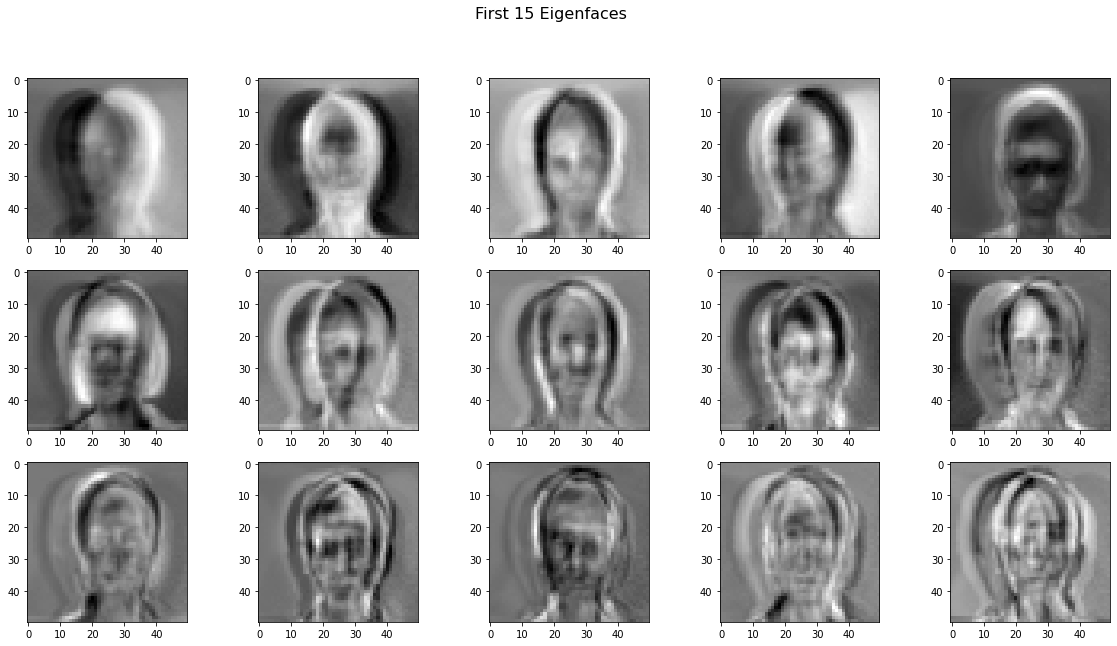

In [13]:
fig, axs = plt.subplots(1,3,figsize=(20,10))
for i in np.arange(15):
    ax = plt.subplot(3,5,i+1)
    img = eigen_vecs[:,i].reshape(50,50)
    plt.imshow(img, cmap='gray')
fig.suptitle("First 15 Eigenfaces", fontsize=16)

Text(0.5, 0.98, 'Last 15 Eigenfaces')

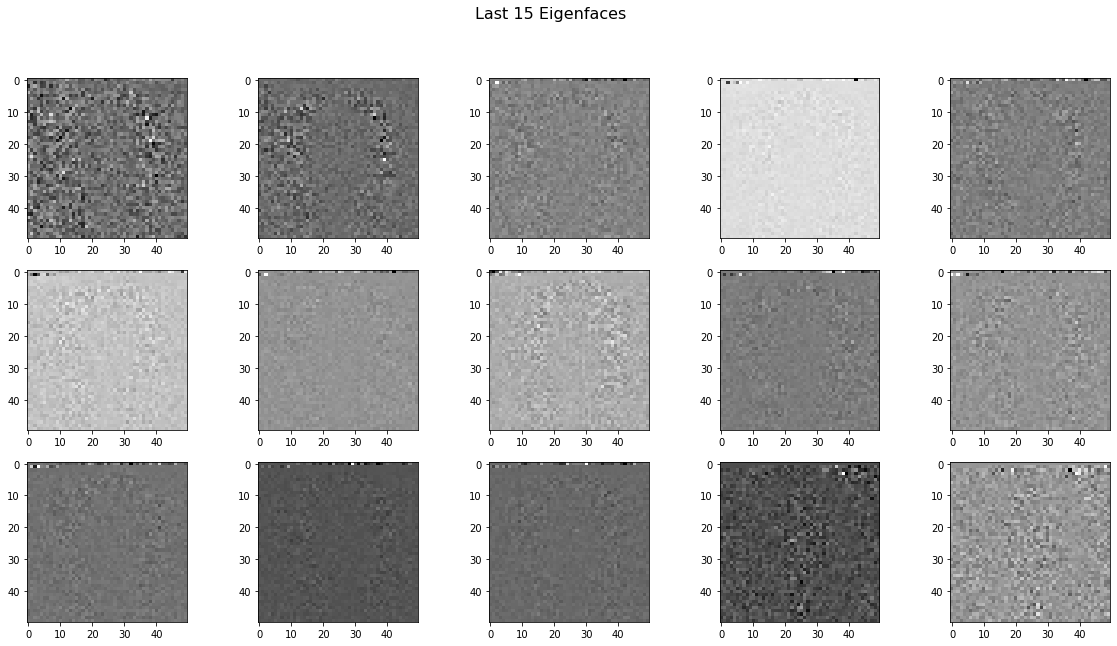

In [14]:
fig, axs = plt.subplots(1,3,figsize=(20,10))
for i in np.arange(15):
    ax = plt.subplot(3,5,i+1)
    img = eigen_vecs[:,-(i+1)].reshape(50,50)
    plt.imshow(img, cmap='gray')
fig.suptitle("Last 15 Eigenfaces", fontsize=16)

In [15]:
## 6. Do reconstruction with eigenfaces

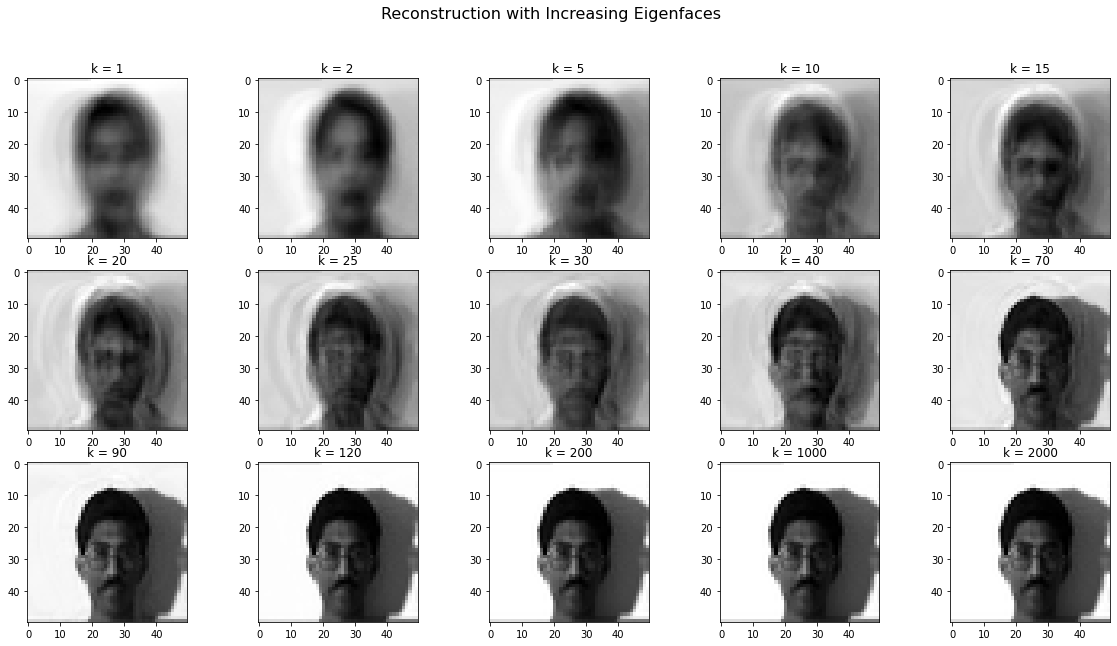

In [16]:

fig, axs = plt.subplots(3,5,figsize=(20,10))
for k, i in zip([0,1,4,9,14,19,24,29,39,69,89,119,199,999,1999],np.arange(15)):
   
    weight = faces_normalized[0,:].dot(eigen_vecs[:,:k]) # get the first k principal components of the first image in the data set
    projected_face = weight.dot(eigen_vecs[:,:k].T) # project the first image into k dimensional feature space using the principal components
    ax = plt.subplot(3,5,i+1)
    ax.set_title("k = "+str(k+1))
    plt.imshow(projected_face.reshape(50,50)+average_face.reshape(50,50),cmap='gray'); # reconstruct and plot original image
fig.suptitle(("Reconstruction with Increasing Eigenfaces"), fontsize=16);